**Ejercicios Planteados**

Con el fin de clasificar las distintas actividades que puede realizar una persona, se realizó un experimento a un grupo de 30 voluntarios dentro de un grupo de edad de 19 a 48 años. Cada persona realizó seis actividades (CAMINAR, CAMINAR POR LAS ESCALERAS, BAJAR LAS ESCALERAS, SENTARSE, DE PIE, RECOSTARSE) con un smartphone (Samsung Galaxy S II) conectado en su cintura. Usando el acelerómetro y giroscopio integrados en el smartphone, se tienen la siguiente data:

• Aceleración triaxial del acelerómetro (aceleración total) y la
aceleración corporal estimada.

• Velocidad angular triaxial del giroscopio.

• Variables de dominio de tiempo y frecuencia.

• Su etiqueta de actividad.

• Un identificador del sujeto que realizó el experimento.

El conjunto de datos obtenido se ha dividido aleatoriamente en dos
conjuntos (train y test), donde se seleccionó al 70% de los voluntarios para generar los datos de entrenamiento y al 30% los datos de la prueba.

In [2]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report

### a) Cargue los set de datos de entrenamiento y prueba. ¿Cuáles son las dimensiones de estos set de datos?

In [17]:
import pandas as pd

# Cargar los datos de entrenamiento y prueba
train_url = "https://raw.githubusercontent.com/natjulian/Contribuci-n-Diplomado-Data-Science-UC-2021/main/Bases%20de%20datos%20Clases/Activity/train.csv"
test_url = "https://raw.githubusercontent.com/natjulian/Contribuci-n-Diplomado-Data-Science-UC-2021/main/Bases%20de%20datos%20Clases/Activity/test.csv"

train_data = pd.read_csv(train_url)
test_data = pd.read_csv(test_url)

# Mostramos los datos
print('Datos de test:')
print(test_data.head())
print('Datos de train:')
print(train_data.head())

Datos de test:
   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.257178          -0.023285          -0.014654         -0.938404   
1           0.286027          -0.013163          -0.119083         -0.975415   
2           0.275485          -0.026050          -0.118152         -0.993819   
3           0.270298          -0.032614          -0.117520         -0.994743   
4           0.274833          -0.027848          -0.129527         -0.993852   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.920091         -0.667683         -0.952501         -0.925249   
1         -0.967458         -0.944958         -0.986799         -0.968401   
2         -0.969926         -0.962748         -0.994403         -0.970735   
3         -0.973268         -0.967091         -0.995274         -0.974471   
4         -0.967445         -0.978295         -0.994111         -0.965953   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ..

In [18]:
# Mostrar las dimensiones de los set de datos
print("Dimensiones del conjunto de datos de entrenamiento:", train_data.shape)
print("Dimensiones del conjunto de datos de prueba:", test_data.shape)

Dimensiones del conjunto de datos de entrenamiento: (7352, 563)
Dimensiones del conjunto de datos de prueba: (2947, 563)


### b) Estudie la cantidad de registros que hay en cada actividad en el set de entrenamiento. Para esto, una opción es utilizar la función de pandas crosstab(index=columna, columns="count"). ¿Cómo se encuentran repartidas las Actividades? ¿Existe algún desbalance en las categorías? (realice un gráfico que acompañe su análisis) Comente.

col_0               count
Activity                 
LAYING               1407
SITTING              1286
STANDING             1374
WALKING              1226
WALKING_DOWNSTAIRS    986
WALKING_UPSTAIRS     1073
Columnas de test: Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)


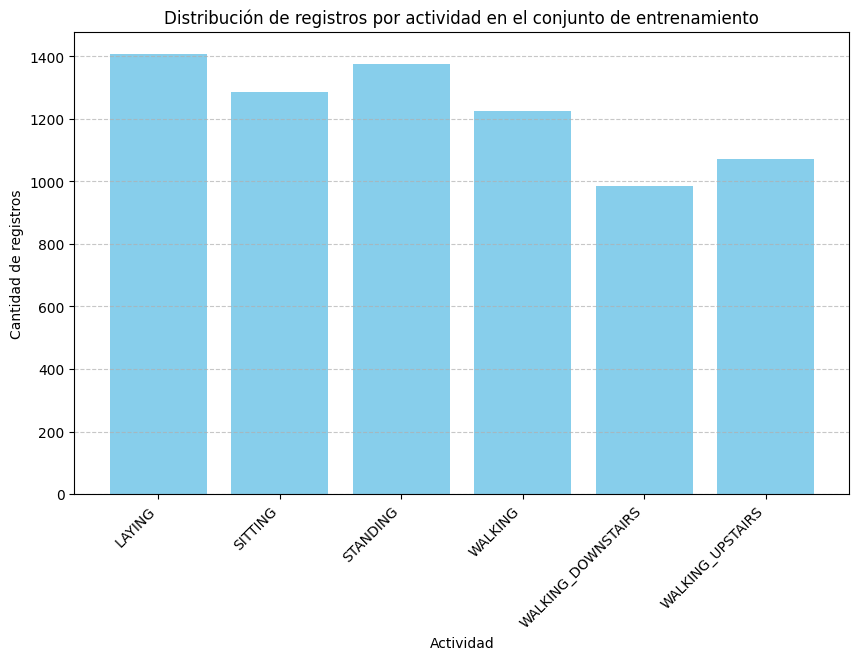

In [21]:
import matplotlib.pyplot as plt

# Utilizar crosstab para contar la cantidad de registros por actividad
activity_counts = pd.crosstab(index=train_data['Activity'], columns="count")

# Mostrar los datos de la tabla de frecuencia
print(activity_counts)

#mostrar las columnas de los datos
print('Columnas de test:', test_data.columns)

# Graficar la distribución de las actividades
plt.figure(figsize=(10, 6))
plt.bar(activity_counts.index, activity_counts['count'], color='skyblue')
plt.xlabel('Actividad')
plt.ylabel('Cantidad de registros')
plt.title('Distribución de registros por actividad en el conjunto de entrenamiento')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



Este código generará un gráfico de barras que muestra la cantidad de registros para cada actividad en el conjunto de entrenamiento, además de imprimir la tabla de frecuencia con la cantidad de registros por actividad.

Al observar el gráfico y la tabla se puede analizar si existe algún desbalance en las categorías. Si alguna actividad tiene significativamente menos registros que otras, podría considerarse un desbalance que debe tenerse en cuenta al entrenar el modelo.

El gráfico de barras presenta la distribución de seis actividades distintas: LAYING, SITTING, STANDING, WALKING, WALKING_DOWNSTAIRS y WALKING_UPSTAIRS, junto con sus respectivos recuentos. Aquí se analiza la distribución:

-- LAYING: Encabeza la lista con 1407 instancias, siendo la actividad más frecuente en el conjunto de datos.

-- SITTING: Sigue de cerca con 1286 instancias. STANDING: También es común, con 1374 instancias.

-- WALKING: Aunque aún es significativa, registra 1226 instancias.

-- WALKING_DOWNSTAIRS: Presenta un número menor de instancias, con 986.

-- WALKING_UPSTAIRS: Es la menos común, con 1073 instancias. En general, las actividades de reposo (LAYING, SITTING y STANDING) superan en frecuencia a las actividades de movimiento (WALKING y escaleras).

Este desequilibrio podría incidir en el rendimiento de un modelo de aprendizaje automático, especialmente si se busca predecir actividades menos frecuentes.

### c) Defina X_train y X_test como corresponda (omitiendo las variables que no corresponden a variables predictoras).

In [24]:
# Para X_test, tomamos todas las columnas de 'test' excepto 'Activity'
X_test = test_data.drop('Activity', axis=1)

# Y_test es simplemente la columna 'Activity' de 'test'
Y_test = test_data['Activity']

# Hacemos lo mismo para el conjunto de entrenamiento: para X_train, tomamos todas las columnas de 'train' excepto 'Activity'
X_train = train_data.drop('Activity', axis=1)

# Y_train es simplemente la columna 'Activity' de 'train'
Y_train = train_data['Activity']

### d) Estandarice el set de features de entrenamiento y prueba. Recuerde que puede utilizar la función vista en clases StandardScaler: from sklearn.preprocessing import StandardScaler x_stand = StandardScaler().fit_transform(x)

In [26]:
from sklearn.preprocessing import StandardScaler

# Inicializar el objeto StandardScaler
scaler = StandardScaler()

# Estandarizar el conjunto de características de entrenamiento
X_train_stand = scaler.fit_transform(X_train)

# Estandarizar el conjunto de características de prueba utilizando la misma transformación que se aplicó a los datos de entrenamiento
X_test_stand = scaler.transform(X_test)

### e) Defina y_train e y_test como corresponda (recuerde que debe estar codificada numéricamente). Para recodificar un vector o columna y de varias categorías a formato numérico puede utilizar:

• from sklearn import preprocessing

• encoder=preprocessing.LabelEncoder().fit(y)

• y_new=encodertrain.transform(y)

In [27]:
from sklearn import preprocessing

# Crear el codificador
encoder = preprocessing.LabelEncoder()

# Ajustar el codificador a las etiquetas de entrenamiento y prueba
encoder.fit(pd.concat([Y_train, Y_test]))

# Transformar las etiquetas de entrenamiento y prueba
Y_train_encoded = encoder.transform(Y_train)
Y_test_encoded = encoder.transform(Y_test)

# Imprimir los resultados
print("Y_train_encoded: ", Y_train_encoded)
print("Y_test_encoded: ", Y_test_encoded)

Y_train_encoded:  [2 2 2 ... 5 5 5]
Y_test_encoded:  [2 2 2 ... 5 5 5]


### f) Defina un diccionario con las opciones de:

• El kernel se mueva entre linear o rbf

• El C se mueva entre los valores 10 y 15

In [31]:
param_options = {'kernel': ['linear', 'rbf'],
                 'C': [10, 15]}

# Imprimir el diccionario
print(param_options)

{'kernel': ['linear', 'rbf'], 'C': [10, 15]}


### g) Utilice la función GridSearchCV para realizar 10 validaciones cruzadas con la lista de parámetros definida anteriormente. Determine la mejor combinación de parámetros y obtenga el modelo con dichos parámetros.

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Crear el clasificador SVM
svm = SVC()

# Definir la búsqueda de cuadrícula con la lista de parámetros y 10 validaciones cruzadas
grid_search = GridSearchCV(svm, param_grid=param_options, cv=10)

# Realizar la búsqueda de cuadrícula en los datos de entrenamiento
grid_search.fit(X_train_stand, y_train_encoded)

# Obtener la mejor combinación de parámetros
best_params = grid_search.best_params_
print("Mejor combinación de parámetros:", best_params)

# Obtener el modelo con los mejores parámetros
best_model = grid_search.best_estimator_

Mejor combinación de parámetros: {'C': 10, 'kernel': 'rbf'}


### h) ¿Cómo es la capacidad predictiva de este modelo en el set de prueba? Comente.

In [11]:
from sklearn.metrics import accuracy_score

# Predecir las etiquetas de clase en el conjunto de prueba
y_pred = best_model.predict(X_test_stand)

# Calcular la precisión del modelo en el conjunto de prueba
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Precisión del modelo en el conjunto de prueba:", accuracy)

Precisión del modelo en el conjunto de prueba: 0.9609772650152698


Una precisión del 96.10% en el conjunto de prueba es bastante alta y sugiere que el modelo de SVM entrenado con la mejor combinación de parámetros tiene una capacidad predictiva sólida. Esto significa que el modelo es capaz de predecir correctamente la actividad realizada por una persona a partir de los datos del acelerómetro y el giroscopio con una precisión muy alta en el conjunto de prueba.

Una precisión tan alta indica que el modelo generaliza bien a nuevos datos y es capaz de capturar patrones importantes en los datos de entrenamiento que también se aplican a los datos de prueba. Esto es una señal positiva de que el modelo puede ser útil en la clasificación de actividades humanas basadas en datos de sensores como los proporcionados en este conjunto de datos.

En resumen, un resultado de precisión del 96.10% sugiere que el modelo SVM entrenado es bastante confiable para predecir las actividades humanas en nuevos datos con características similares a los datos de prueba.

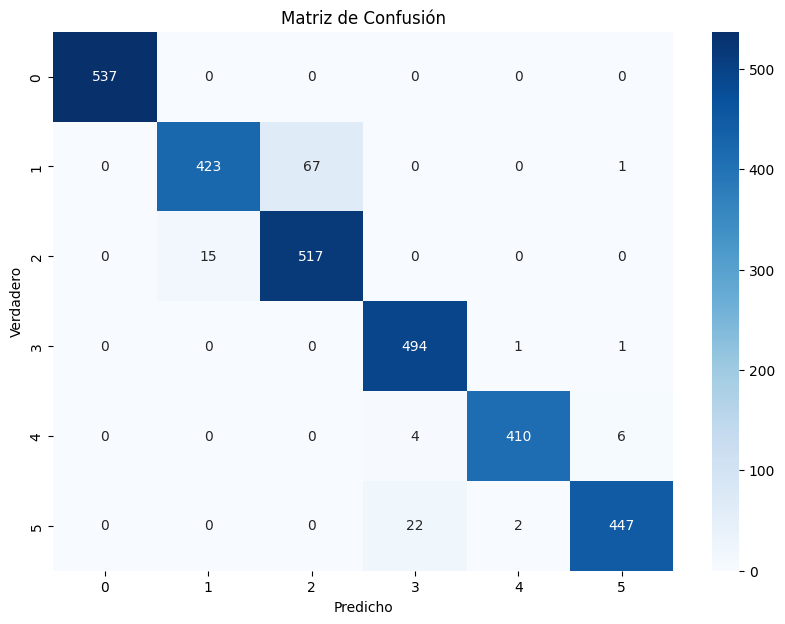

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de confusión
cm = confusion_matrix(Y_test_encoded, Y_test_pred)

# Crear un mapa de calor a partir de la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')

plt.show()

In [34]:
from sklearn.metrics import classification_report

# Generar informe de clasificación
report = classification_report(Y_test_encoded, Y_test_pred)

print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.97      0.86      0.91       491
           2       0.89      0.97      0.93       532
           3       0.95      1.00      0.97       496
           4       0.99      0.98      0.98       420
           5       0.98      0.95      0.97       471

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



El informe de clasificación ofrece una evaluación detallada del desempeño del modelo de clasificación en cada clase. Aquí se presenta la interpretación de las métricas clave:

Precisión (Precision): La precisión mide la proporción de predicciones positivas correctas en relación con todas las predicciones positivas realizadas. En promedio, el modelo exhibe una precisión del 96%. Esto significa que, en general, cuando el modelo etiqueta una clase como positiva, acierta el 96% de las veces.

Recuerdo (Recall): El recuerdo mide la proporción de verdaderos positivos respecto al total de muestras positivas reales. En promedio, el modelo presenta un recuerdo del 96%. Esto indica que el modelo identifica correctamente el 96% de todas las muestras positivas.

Valor F1 (F1 Score): El valor F1 combina precisión y recuerdo en una única métrica. En promedio, el valor F1 alcanza el 96%, lo que sugiere un buen equilibrio entre precisión y recuerdo.

Exactitud (Accuracy): La exactitud evalúa la proporción de muestras clasificadas correctamente. En este caso, la exactitud alcanza el 96%, lo que indica un rendimiento general sólido del modelo.

En resumen, el modelo presenta un desempeño sólido en la mayoría de las clases, con altos valores de precisión, recuerdo y valor F1. Sin embargo, es crucial considerar el contexto específico del problema y las implicaciones de los errores (falsos positivos y falsos negativos) para determinar si el rendimiento es satisfactorio para tus necesidades específicas.